# Contents of This Note Book
- Random Data Generation for COSINE 
- Single Layer Nerual Network Creation
- Model Errors Visualization and Understanding 
- Model Saving and Loading
- Comparison between Predictions and Real Data

Author :
 ❤ **Muhammad Luqman** ❤

## Libraries Importing and seed set


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## Dataset

### Data Creation and Visualization


**Data Creation**
- 1000 Samples along X-axis 
- Randomly Unfiform with 0 - 2(pi) Range
- Shuffling Them so order is removed
- Generating a Sin wave with values along X-axis
- Plotting the Data on X-Y Plane

In [3]:
SAMPLES = 1000
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)
np.random.shuffle(x_values)
y_values = np.sin(x_values).astype(np.float32)

# plt.plot(x_values, y_values, 'b.')
# plt.show()

Text(0.5, 0, 'Number of Sample')

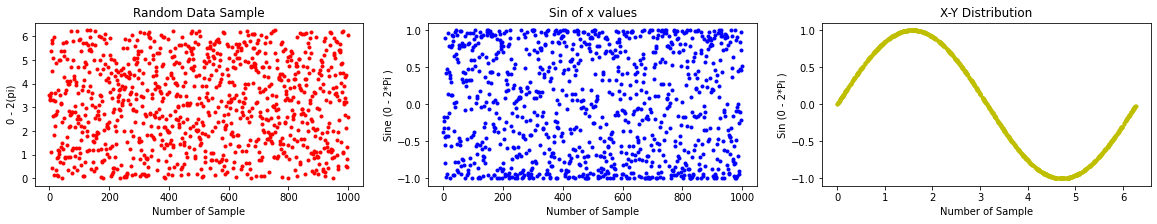

In [4]:
f = plt.figure(figsize=(20,3)) #setting a figure size
# 1x3 matrix and corresponding entries 
plot_x = f.add_subplot(131)
plot_y = f.add_subplot(132)
plot_xy = f.add_subplot(133)
# PLotting all values
plot_x.plot(x_values, 'r.')
plot_y.plot( y_values, 'b.')
plot_xy.plot(x_values, y_values, 'y.')
# providing representetive titles and axis names
plot_x.set_title("Random Data Sample");plot_x.set_ylabel('0 - 2(pi)');plot_x.set_xlabel('Number of Sample')
plot_y.set_title("Sin of x values");plot_y.set_ylabel('Sine (0 - 2*Pi )');plot_y.set_xlabel('Number of Sample')
plot_xy.set_title("X-Y Distribution");plot_xy.set_ylabel('Sin (0 - 2*Pi )');plot_xy.set_xlabel('Number of Sample')

### Adding Noise to build  Generalized Data


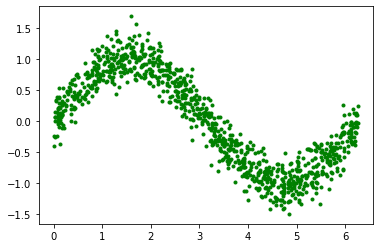

In [5]:
y_values += 0.2 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'g.')
plt.show()

### Data Split for **Training** **Testing** and **Validating**
- Variables values 
- Total Samples = 1000 
- *Training* = 600 *Testing* = 200 *Validating* = 200 



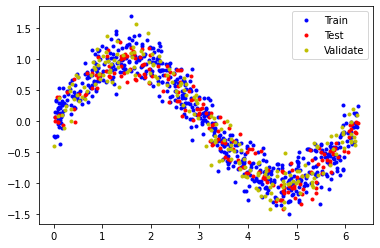

In [6]:
TRAIN_SPLIT =  int(0.6 * SAMPLES)# variable value = 600
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT) # variable value = 800
##Train=[0: 600],Test=[600:800],Validate=[800:1000] -> 600 ,200 ,200                          
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


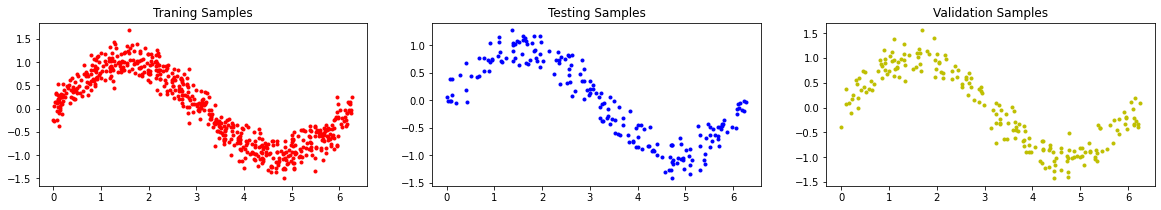

In [7]:
f = plt.figure(figsize=(20,3)) #setting a figure size
# 1x3 matrix and corresponding entries 
plot_train = f.add_subplot(131)
plot_test = f.add_subplot(132)
plot_validate = f.add_subplot(133)
# PLotting all values
plot_train.plot(x_train, y_train, 'r.',)
plot_test.plot(x_test, y_test, 'b.')
plot_validate.plot(x_validate,y_validate, 'y.')
# providing representetive titles 
plot_train.set_title("Traning Samples");
plot_test.set_title("Testing Samples");
plot_validate.set_title("Validation Samples");

## Model Creation 

Creating Single Layer *Nerual Network*
- **Integeration**
  - 16 inputs
  - 1 output
- **Activation**
  - Relu ( Rectified Linear Unit )
- **Optimizer**
  - Adam
- **Loss Calculations**
  - Mean Squared Error 
  - Mean Absolute Error


In [8]:
sin_model = tf.keras.Sequential()
sin_model.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
sin_model.add(keras.layers.Dense(1))
sin_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
sin_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Training the Model
- Epochs = 500
- Batch Size = 32



In [ ]:
sin_model_history = sin_model.fit(x_train, y_train, epochs=500, batch_size=32,validation_data=(x_validate, y_validate))

## Interpreting Model Training Errors 
- LOSS (**Mean Squared Error**)
  - Distance between prediction and actual values in training and validation sets

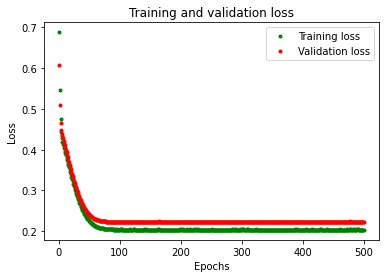

In [10]:
train_loss_mse   = sin_model_history.history['loss']
val_loss_mse = sin_model_history.history['val_loss']
epochs = range(1, len(train_loss_mse) + 1)

plt.plot(epochs, train_loss_mse, 'g.', label='Training loss')
plt.plot(epochs, val_loss_mse, 'r.',   label='Validation loss')
plt.title('Training and validation loss');plt.xlabel('Epochs');plt.ylabel('Loss')
plt.legend()
plt.show()



Text(0, 0.5, 'Loss( MSE )')

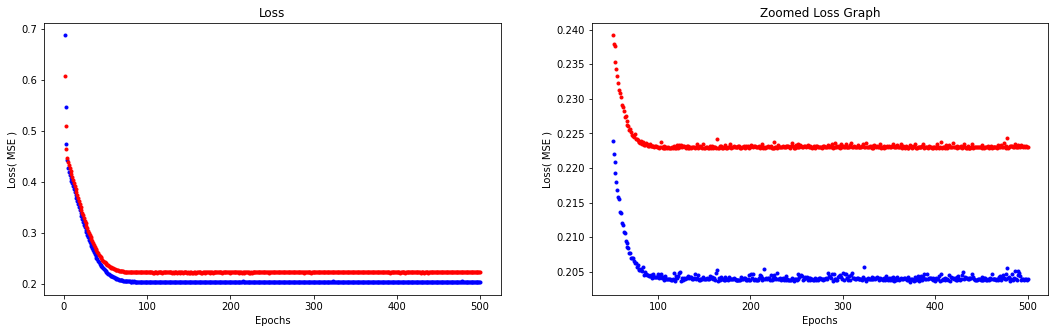

In [13]:
f = plt.figure(figsize=(18,5)) #setting a figure size
# 1x2 matrix and corresponding entries 
plot_loss = f.add_subplot(121)
plot_zoom_loss = f.add_subplot(122)
# PLotting all values
plot_loss.plot(epochs, train_loss_mse, 'b.' )
plot_loss.plot(epochs, val_loss_mse, 'r.'  )
plot_zoom_loss.plot(epochs[50:], train_loss_mse[50:], 'b.')
plot_zoom_loss.plot(epochs[50:], val_loss_mse[50:]  , 'r.')
# providing representetive titles and axis names
plot_loss.set_title("Loss");plot_loss.set_xlabel('Epochs');plot_loss.set_ylabel('Loss( MSE )')
plot_zoom_loss.set_title("Zoomed Loss Graph");plot_zoom_loss.set_xlabel('Epochs');plot_zoom_loss.set_ylabel('Loss( MSE )')


- LOSS ( **Mean Absolute Error** )

Text(0, 0.5, 'Loss( MAE )')

<Figure size 432x288 with 0 Axes>

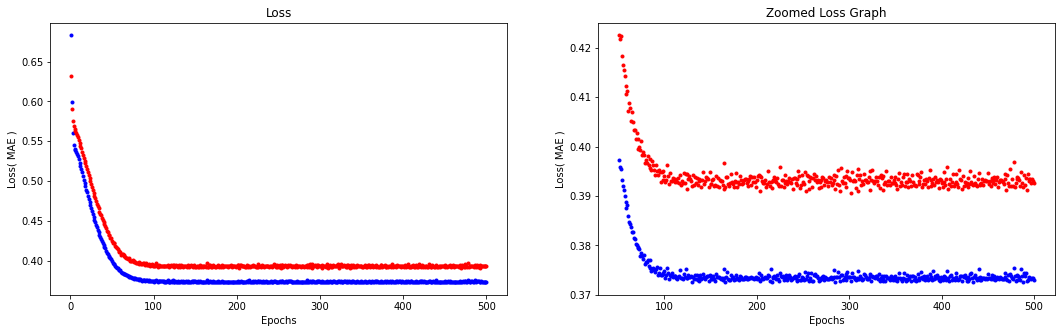

In [16]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_loss_mae = sin_model_history.history['mae']
val_loss_mae = sin_model_history.history['val_mae']

#setting a figure size
f = plt.figure(figsize=(18,5)) 
# 1x2 matrix and corresponding entries 
plot_loss = f.add_subplot(121)
plot_zoom_loss = f.add_subplot(122)
# PLotting all values
plot_loss.plot(epochs, train_loss_mae, 'b.'  )
plot_loss.plot(epochs, val_loss_mae  , 'r.' )
plot_zoom_loss.plot(epochs[50:], train_loss_mae[50:], 'b.')
plot_zoom_loss.plot(epochs[50:], val_loss_mae[50:]  , 'r.')
# providing representetive titles and axis names
plot_loss.set_title("Loss");plot_loss.set_xlabel('Epochs');plot_loss.set_ylabel('Loss( MAE )')
plot_zoom_loss.set_title("Zoomed Loss Graph");plot_zoom_loss.set_xlabel('Epochs');plot_zoom_loss.set_ylabel('Loss( MAE )')


**Analysis** : These Differences in loss values among Training and Validation is Alarming because data nature is same but model is not generalizing , smell of Overfitting is sensed 🙅

## Saving and Loading and Deploying Model

- Saving Model

In [19]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = '/content/models_dir/sin_model/'
save_model(sin_model, filepath)

INFO:tensorflow:Assets written to: /content/models_dir/sin_model/assets


- Loading Model


In [20]:
sin_model_saved = load_model(filepath, compile = True)

- Prediction from our Saved Model 

Text(0, 0.5, 'Y - Prediction Values ')

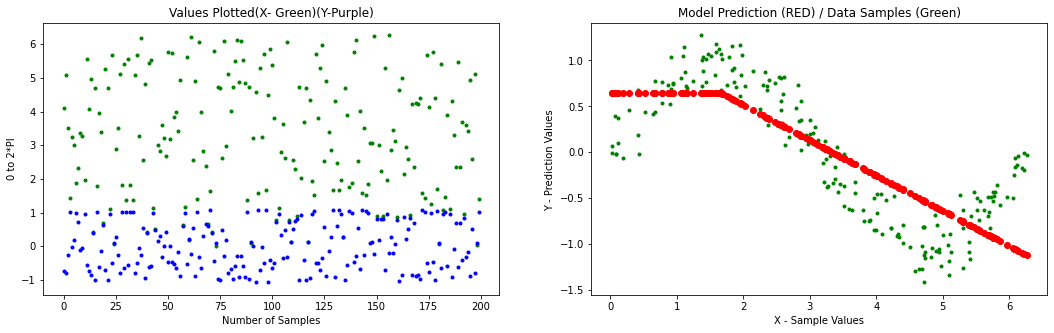

In [25]:
predicted_y_values_sin = sin_model_saved.predict(x_test)

#setting a figure size
f = plt.figure(figsize=(18,5)) 
# 1x2 matrix and corresponding entries 
values = f.add_subplot(121)
xy_prediction = f.add_subplot(122)
# PLotting all values
values.plot(x_test,'g.')
values.plot(predicted_y_values,'b.')
xy_prediction.plot(x_test, y_test, 'g.')
xy_prediction.plot(x_test, predicted_y_values_sin, 'ro', label='TF predictions')
# providing representetive titles and axis names
values.set_title("Values Plotted(X- Green)(Y-Purple)");values.set_xlabel('Number of Samples');values.set_ylabel('0 to 2*PI')
xy_prediction.set_title("Model Prediction (RED) / Data Samples (Green)");xy_prediction.set_xlabel('X - Sample Values');xy_prediction.set_ylabel('Y - Prediction Values ')




---



---



**CONCLUSION** :As we Can see Our Model has not Approxiamted the Function and so we need to imporove it .



---



---



## Model Improvement 
- Increasing Number of Parameters in model
  - By increasing Layers

In [22]:
sin_improved_model = tf.keras.Sequential()
sin_improved_model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))
sin_improved_model.add(keras.layers.Dense(16, activation='relu'))
sin_improved_model.add(keras.layers.Dense(1))
sin_improved_model.compile(optimizer='adam', loss="mse", metrics=["mae"])
sin_improved_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [23]:
sinImpr_history = sin_improved_model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 0s 14ms/step - loss: 0.4876 - mae: 0.6055 - val_loss: 0.4686 - val_mae: 0.5882
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4366 - mae: 0.5587 - val_loss: 0.4400 - val_mae: 0.5683
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4140 - mae: 0.5373 - val_loss: 0.4173 - val_mae: 0.5547
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3931 - mae: 0.5234 - val_loss: 0.3969 - val_mae: 0.5433
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3730 - mae: 0.5103 - val_loss: 0.3786 - val_mae: 0.5321
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3553 - mae: 0.4981 - val_loss: 0.3612 - val_mae: 0.5210
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3381 - mae: 0.4855 - val_loss: 0.3444 - val_mae: 0.5102
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3215 - 

Text(0, 0.5, 'Y - Prediction Values ')

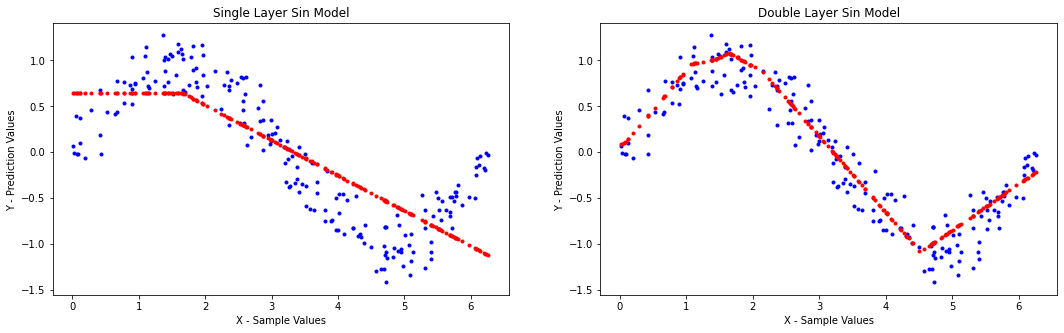

In [28]:
predicted_y_values_sinImproved = sin_improved_model.predict(x_test)

#setting a figure size
f = plt.figure(figsize=(18,5)) 
# 1x2 matrix and corresponding entries 
xy_prediction_sin = f.add_subplot(121)
xy_prediction_sinImporoved = f.add_subplot(122)
# PLotting all values
xy_prediction_sin.plot(x_test, y_test, 'b.')
xy_prediction_sin.plot(x_test, predicted_y_values_sin, 'r.')

xy_prediction_sinImporoved.plot(x_test, y_test, 'b.')
xy_prediction_sinImporoved.plot(x_test, predicted_y_values_sinImproved, 'r.')
# providing representetive titles and axis names
xy_prediction_sin.set_title("Single Layer Sin Model");xy_prediction_sin.set_xlabel('X - Sample Values');xy_prediction_sin.set_ylabel('Y - Prediction Values ')
xy_prediction_sinImporoved.set_title("Double Layer Sin Model");xy_prediction_sinImporoved.set_xlabel('X - Sample Values');xy_prediction_sinImporoved.set_ylabel('Y - Prediction Values ')


**Conclusion** : As we can Clearly see that our models are having a clear prediction difference , one layer added and now our sin function can be predicted quite accurately 

## TF Lite Conversions and Comparison